<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº3
#### Nicolás Sewrjugin


# Introducción

En el análisis digital de señales, una de las herramientas fundamentales es la "Transformada Discreta de Fourier" (DFT), usualmente calculada mediante el algoritmo de la FFT ("Fast Fourier Transform"). Esta permite representar una señal periódica o finita en el tiempo como la suma de sus componentes de frecuencia:
\begin{equation}
X[k] = 
\underbrace{\sum_{n=0}^{N/2-1} x[2n] \, e^{-j 2 \pi k n / (N/2)}}_{\text{DFT de los pares}}
+
e^{-j 2 \pi k / N} \,
\underbrace{\sum_{n=0}^{N/2-1} x[2n+1] \, e^{-j 2 \pi k n / (N/2)}}_{\text{DFT de los impares}}
\end{equation}


Un concepto central es la densidad espectral de potencia (*PSD*), que describe cómo se distribuye la potencia de una señal a lo largo de las frecuencias. Para señales discretas, la relación entre dominio temporal y dominio frecuencial está garantizada por la *Identidad de Parseval*:
\begin{equation}
\sum_{n=0}^{N-1} |x[n]|^2 \;=\; \frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2
\end{equation}

donde *x[n]* es la señal en el tiempo y *X[k]* su DFT. Esto asegura la conservación de energía entre ambos dominios.

Sin embargo, al aplicar la FFT aparecen fenómenos no ideales como el desparramo espectral. Este ocurre cuando la frecuencia de la señal no coincide exactamente con un múltiplo de la resolución espectral *Δf=fs/N*. En ese caso, la energía de la señal no queda contenida en un solo bin de la FFT, sino que se reparte entre frecuencias vecinas, produciendo un ensanchamiento del pico espectral. Al tomar un número de muestras *N*, se le aplica implícitamente una ventana rectangular, que hará más o menos ancho dicho pico, cuya envolvente es la función *sinc*:
\begin{equation}
W(f) = \frac{\sin\!\left( \pi N \tfrac{f}{f_s} \right)}{\sin\!\left( \pi \tfrac{f}{f_s} \right)}
\end{equation}


En este trabajo, se estudió dicho fenómeno mediante señales senoidales de potencia normalizada, analizando los casos de una frecuencia exactamente alineada con un bin de la FFT y dos frecuencias con ciertas desintonías (*+0.25Δf* y *+0.5Δf*). Se graficaron las correspondientes densidades espectrales de potencia y se verificaron sus potencias unitarias utilizando la *Identidad de Parseval*. Además, en virtud de observar de mejor manera el desparramo, se exploró el efecto del zero padding, una técnica que consiste en agregar ceros al final de la señal temporal para aumentar el número de muestras de la FFT. Esto no aumenta la información de la señal, pero mejora la resolución visual del espectro, permitiendo interpolar los puntos de la densidad espectral y observar con mayor detalle el desplazamiento de la energía entre bins cuando la frecuencia de la señal no coincide exactamente con un múltiplo de *Δf*. Trabaja especialmente con la *sinc* de la ventana rectangular ya comentada.


# Análisis y desarrollo

En este experimento se generaron tres señales senoidales de amplitud $\sqrt{2}$, asegurando que cada una tenga potencia unitaria:
\begin{equation}
x[n] = \sqrt{2} \, \sin\big(2 \pi f_0 \, n T_s\big)
\end{equation}

La diferencia entre las señales radicaba en la *f0*, habiéndose elegido frecuencias específicas para observar el desparramo en la densidad espectral de potencia (*PSD*):
\begin{equation}
f_0 = k_0 \cdot \Delta f, \quad 
\Delta f = \frac{f_s}{N}, \quad
k_0 = \frac{N}{4}, \; \frac{N}{4}+0.25, \; \frac{N}{4}+0.5
\end{equation}

La *PSD* se puede definir como:
\begin{equation}
PSD[k] = \frac{1}{N f_s} \, |X[k]|^2 
\end{equation}


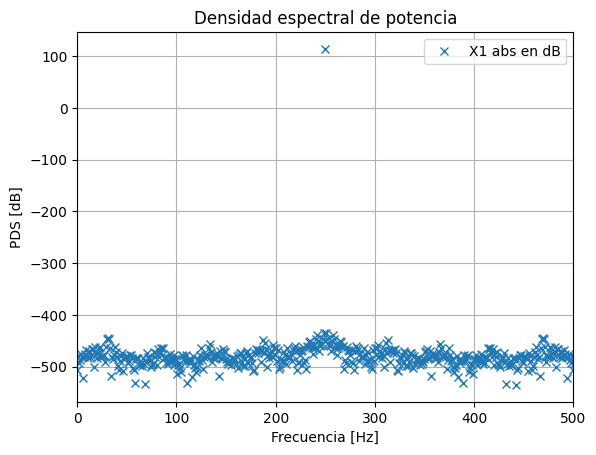

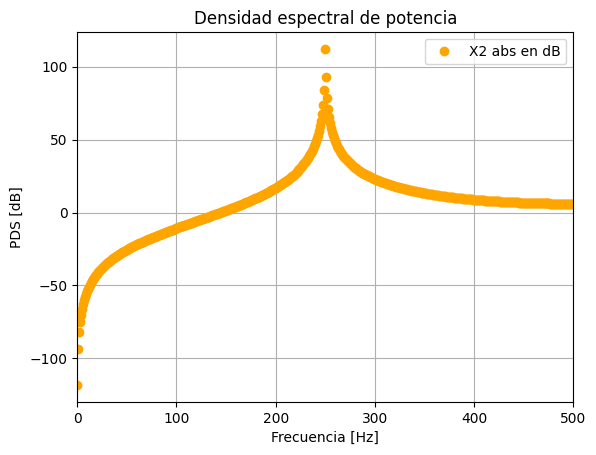

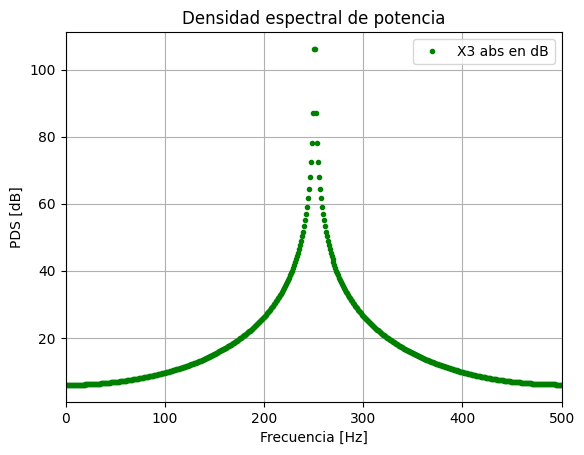

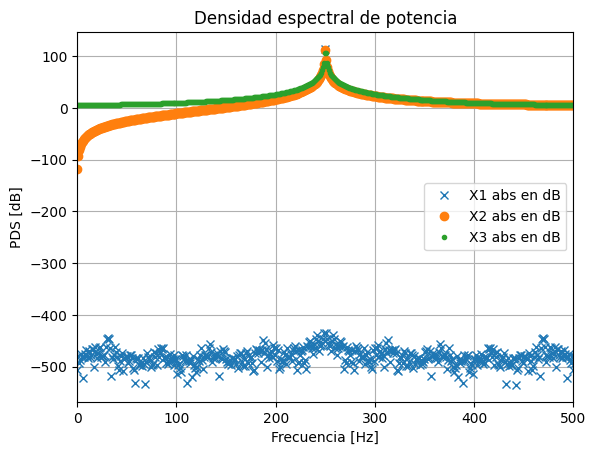

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from numpy.fft import fft
from scipy.signal import freqz

N=1000
fs=N

def mi_funcion_sen(ff,nn,vmax=1, dc=0,ph=0, fs=2): 
    
    df = fs/nn
    ts = 1/fs
    
    t = np.arange(0, nn)*ts
    x = vmax*np.sin(2*np.pi*ff*df*t+ph)+dc 
    
    return x

x1=mi_funcion_sen(ff=N/4,nn=N,fs=fs,vmax=np.sqrt(2))
x2=mi_funcion_sen(ff=(N/4)+0.25,nn=N,fs=fs,vmax=np.sqrt(2))
x3=mi_funcion_sen(ff=(N/4)+0.5,nn=N,fs=fs,vmax=np.sqrt(2))

X1 = np.fft.fft(x1)
X2 = np.fft.fft(x2)
X3 = np.fft.fft(x3)

X1abs = np.abs(X1)
X2abs = np.abs(X2)
X3abs = np.abs(X3)

freqs = np.arange(0, N)*(fs/N) #eje de frecuencias

plt.figure(1)
plt.plot(freqs,20*np.log10(X1abs**2),'x',label='X1 abs en dB')
plt.xlim([0,fs/2])
plt.title('Densidad espectral de potencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PDS [dB]')
plt.legend()
plt.grid()
plt.show()

plt.figure(2)
plt.plot(freqs,20*np.log10(X2abs**2),'o',label='X2 abs en dB',color='orange')
plt.xlim([0,fs/2])
plt.title('Densidad espectral de potencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PDS [dB]')
plt.legend()
plt.grid()
plt.show()

plt.figure(3)
plt.plot(freqs,20*np.log10(X3abs**2),'.',label='X3 abs en dB',color='green')
plt.xlim([0,fs/2])
plt.title('Densidad espectral de potencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PDS [dB]')
plt.legend()
plt.grid()
plt.show()

plt.figure(4)
plt.plot(freqs,20*np.log10(X1abs**2),'x',label='X1 abs en dB')
plt.plot(freqs,20*np.log10(X2abs**2),'o',label='X2 abs en dB')
plt.plot(freqs,20*np.log10(X3abs**2),'.',label='X3 abs en dB')
plt.xlim([0,fs/2])
plt.title('Densidad espectral de potencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PDS [dB]')
plt.legend()
plt.grid()
plt.show()


- La primera señal (*k0=N/4*) se puede apreciar que coincide exactamente con un bin (punto) de la FFT, por lo que su energía espectral queda concentrada en un único coeficiente, ya que tiene una frecuencia que es múltiplo de *Δf*. La senoidal completa exactamente un número entero de ciclos dentro del vector de *N* muestras. En *-500 dB* aproximadamente, se presenta el piso de ruido, formado por los valores de la FFT que son muy pequeños (casi nulos) y que no aportan nada de energía (pero que se encuentran allí latentes por errores númericos de la FFT). 

- Tanto la segunda (*k0=N/4+0.25*), como la tercera (*k0=N/4+0.5*), están ligeramente desfasadas respecto al bin, generando el fenómeno conocido como desparramo espectral. Aparecen lóbulos laterales, ya que la energía de la señal se distribuye entre varios bins vecinos. Todos los bins tiene valores considerables de energía. Esto ocurre como resultado de que la frecuencia de la señal no coincide exactamente con un múltiplo de *Δf* (la señal no completa un número entero de ciclos dentro de la ventana).

- Además, en la que se encuentra medio bin desfasada, la energía se distribuye simétricamente. Sin embargo, en la de un cuarto de bin, se puede percibir que los del comienzo reciben menos energía (inicia en *-100 dB* aproximadamente) que los posteriores al pico, generando una asimetría evidente. 


### Identidad de Parseval

Al tener el seno una media nula ($E\{x[n]\}$), la potencia media ($E\{x^2[n]\}$) coincide con su varianza. Por lo tanto, al obtener esta última, se puede conocer si es de potencia unitaria también: 
\begin{equation}
P = \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^2 = E\{x^2[n]\}
\end{equation}
\begin{equation}
\sigma_x^2 = E\{x^2[n]\} - \underbrace{\left(E\{x[n]\}\right)^2}_{\text{0}}
\end{equation}

Sin embargo, eso sería en el dominio del tiempo. Para el dominio frecuencial (*PSD*), ya se mencionó que se puede confirmar fácilmente con la *Identidad de Parseval* (básicamente, la potencia media en el dominio del tiempo es igual a la del dominio de la frecuencia). Cabe destacar que, en ambos lados de la igualdad, hay que normalizar por la cantidad de muestras.

In [2]:
#Identidad de Parseval
Var1 = np.var(x1)
Var2 = np.var(x2)
Var3 = np.var(x3)
print(f"Varianza de f=N/4 (potencia unitaria): {Var1:3.1f}")
print(f"Varianza de f=N/4+0.25 (potencia unitaria): {Var2:3.1f}")
print(f"Varianza de f=N/4+0.5 (potencia unitaria): {Var3:3.1f}")

energia_tiempo1 = (1/N)*np.sum(np.abs(x1)**2)
energia_frecuencia1 = (1/N**2) * np.sum(X1abs**2)
energia_tiempo2 = (1/N)*np.sum(np.abs(x2)**2)
energia_frecuencia2 = (1/N**2) * np.sum(X2abs**2)
energia_tiempo3 = (1/N)*np.sum(np.abs(x3)**2)
energia_frecuencia3 = (1/N**2) * np.sum(X3abs**2)
print(f"Energía en el dominio del tiempo para f=N/4 (potencia unitaria): {energia_tiempo1:3.1f}")
print(f"Energía en el dominio del tiempo para f=N/4+0.25 (potencia unitaria): {energia_tiempo2:3.1f}")
print(f"Energía en el dominio del tiempo para f=N/4+0.5 (potencia unitaria): {energia_tiempo3:3.1f}")
print(f"Energía en el dominio de la frecuencia para f=N/4 (potencia unitaria): {energia_frecuencia1:3.1f}")
print(f"Energía en el dominio de la frecuencia para f=N/4+0.25 (potencia unitaria): {energia_frecuencia2:3.1f}")
print(f"Energía en el dominio de la frecuencia para f=N/4+0.5 (potencia unitaria): {energia_frecuencia3:3.1f}")

Varianza de f=N/4 (potencia unitaria): 1.0
Varianza de f=N/4+0.25 (potencia unitaria): 1.0
Varianza de f=N/4+0.5 (potencia unitaria): 1.0
Energía en el dominio del tiempo para f=N/4 (potencia unitaria): 1.0
Energía en el dominio del tiempo para f=N/4+0.25 (potencia unitaria): 1.0
Energía en el dominio del tiempo para f=N/4+0.5 (potencia unitaria): 1.0
Energía en el dominio de la frecuencia para f=N/4 (potencia unitaria): 1.0
Energía en el dominio de la frecuencia para f=N/4+0.25 (potencia unitaria): 1.0
Energía en el dominio de la frecuencia para f=N/4+0.5 (potencia unitaria): 1.0


En las tres señales, tanto por el cálculo de la varianza, como por la *Identidad de Parseval* (en ambos dominios), se confirmó que, efectivamente, se trataban de señales de potencia unitaria y su *PSD* también. Esto quiere decir que, por más que haya desparramo, la energía se conserva. 

Cuando la frecuencia está ligeramente corrida, ya no coincide con un bin. Entonces, la energía no puede concentrarse en un único coeficiente *X[k]*, sino que se “desparrama” en muchos bins vecinos. El espectro se ensancha en el pico. Por esta razón, dos senoidales que difieren apenas en unos hercios, se observan con espectros muy distintos. No es que la señal cambie drásticamente, sino que la FFT (por su resolución limitada y su muestreo en bins) la representa de forma muy diferente, pero logrando que se preserve la energía.

### Zero padding

En nuestro caso, se realizó *zero padding* multiplicando por diez el números de muestra *N*. De esta manera, las muestras estarán diez veces más juntas, convirtiéndose en una resolución más fina (cada bin representa *Δf/10 Hz*). Por lo tanto, se percibe con mayor detalle la forma de la envolvente (la función *sinc*) producida por la ventana rectangular de longitud *N*.

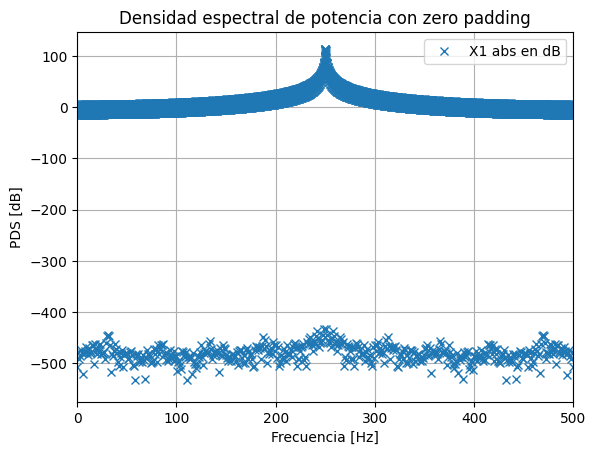

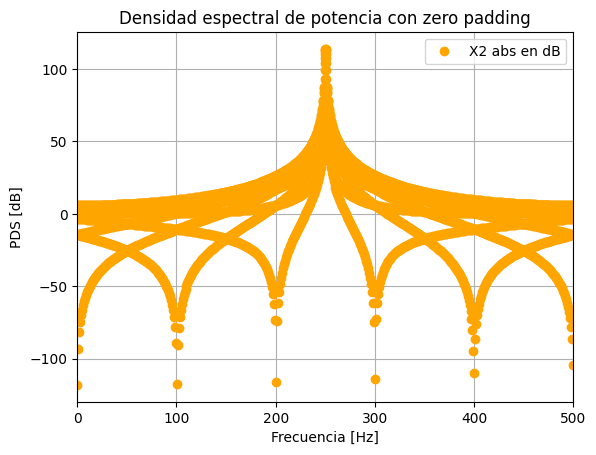

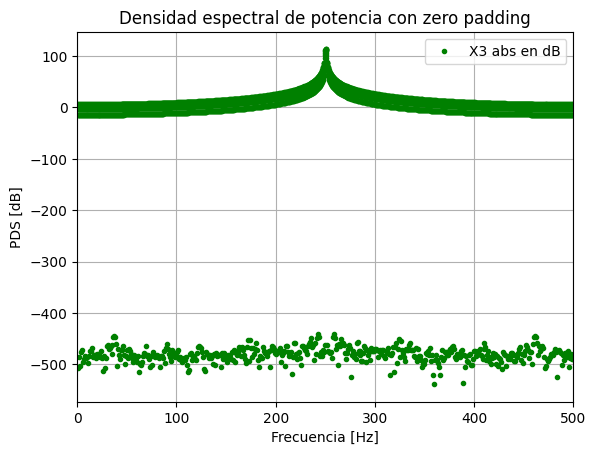

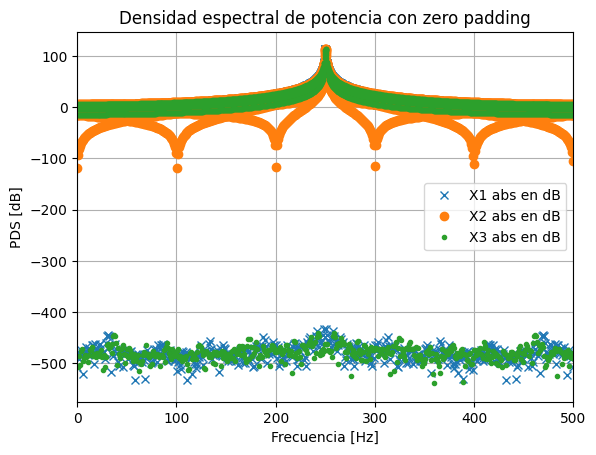

In [3]:
#Zero padding 
x1_padded = np.zeros(10*N)
x1_padded[:N] = x1
x2_padded = np.zeros(10*N)
x2_padded[:N] = x2
x3_padded = np.zeros(10*N)
x3_padded[:N] = x3

# FFT con mayor resolución
X1_padded = np.fft.fft(x1_padded)
X1abs_padded = np.abs(X1_padded)
X2_padded = np.fft.fft(x2_padded)
X2abs_padded = np.abs(X2_padded)
X3_padded = np.fft.fft(x3_padded)
X3abs_padded = np.abs(X3_padded)

# nuevo eje de frecuencias
freqs_padded = np.arange(0, 10*N) * (fs / (10*N))

plt.figure(5)
plt.plot(freqs_padded,20*np.log10(X1abs_padded**2),'x',label='X1 abs en dB')
plt.xlim([0,fs/2])
plt.title('Densidad espectral de potencia con zero padding')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PDS [dB]')
plt.legend()
plt.grid()
plt.show()

plt.figure(6)
plt.plot(freqs_padded,20*np.log10(X2abs_padded**2),'o',label='X2 abs en dB',color='orange')
plt.xlim([0,fs/2])
plt.title('Densidad espectral de potencia con zero padding')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PDS [dB]')
plt.legend()
plt.grid()
plt.show()

plt.figure(7)
plt.plot(freqs_padded,20*np.log10(X3abs_padded**2),'.',label='X3 abs en dB',color='green')
plt.xlim([0,fs/2])
plt.title('Densidad espectral de potencia con zero padding')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PDS [dB]')
plt.legend()
plt.grid()
plt.show()

plt.figure(8)
plt.plot(freqs_padded,20*np.log10(X1abs_padded**2),'x',label='X1 abs en dB')
plt.plot(freqs_padded,20*np.log10(X2abs_padded**2),'o',label='X2 abs en dB')
plt.plot(freqs_padded,20*np.log10(X3abs_padded**2),'.',label='X3 abs en dB')
plt.xlim([0,fs/2])
plt.title('Densidad espectral de potencia con zero padding')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PDS [dB]')
plt.legend()
plt.grid()
plt.show()

En el caso de *k0=N/4*, por más de que no hubiera un desparramo previo, se observa que es similar a la gráfica de las que no coincidían con un bin de la FFT sin *zero padding*. Esto se debe a que, al aumentar la resolución espectral con esta técnica, se revela que también se trataba de una *sinc* (anteriormente, se evidenciaba una sola delta), pero con máxima concentracion en un solo bin. Por esta razón, se asemeja a la gráfica de la *k0=N/4+0.5*. Aunque esta última ya tenía desparramo, con el *zero padding* se distingue más aún la *sinc* que ya se divisaba sin esta interpolación (pero con la energía más repartida entre los bins vecinos). No modifica ni elimina el desparramo generado por la ventana rectangular, solo exhibe una mejor visualización de él.

Por otro lado, en el gráfico de la *k0=N/4+0.25*, con el *zero padding* se acentúa el poder de la envolvente (la *sinc*) y se llegan hasta manifestar los lóbulos secundarios de esta. La energía se reparte de manera más asimétrica y se presentan estos picos alrededor del principal, exponiendo el desparramo.

# Conclusiones
- Por un lado, se comprobó que, cuando la frecuencia de la senoidal coincide exactamente con un bin de la FFT (*k0=N/4*), la energía se concentra en un único coeficiente y el espectro parece una delta, sin lóbulos secundarios visibles. Sin embargo, para senoidales desintonizadas (*k0=N/4+0.25* y *k0=N/4+0.5*), la energía se reparte entre varios bins debido al desparramo espectral. Esto genera lóbulos secundarios característicos de la ventana rectangular, cuyo patrón es similar a una *sinc* discreta. Además, la forma y simetría de los lóbulos dependen de cuánto se desplace la frecuencia respecto al bin más cercano: desfasajes intermedios (*+0.25*) producen lóbulos asimétricos, mientras que desfasajes de media unidad (*+0.5*) generan un espectro simétrico.
- En cuanto a las potencias unitarias, se las confirmó usando su varianza y la *Identidad de Parseval*. Esto demostró que, aunque el desparramo espectral redistribuya la energía entre bins, la potencia total se conserva, cumpliendo la equivalencia entre dominio temporal y frecuencial.
- Finalmente, con la técnica de *zero padding*, se constató que se aumenta "artificialmente" la resolución en frecuencia (*Δf* más pequeño) y se permite una visualización con más detalle la estructura de los lóbulos. El zero padding no elimina el desparramo, ni modifica la potencia total, sino que mejora la interpolación entre bins y favorece la comparación de la forma del espectro para frecuencias desintonizadas. De esta manera, se pudo percibir que, para *ko=N/4* existía una *sinc* latente, exhibiendo su parecido con *ko=N/4+0.5*. Además, con *ko=N/4+0.25*, se observaron los lóbulos secundarios de la *sinc*.

# Bonus

### Respuesta en frecuencia

En el análisis de sistemas discretos lineales e invariantes en el tiempo (LTI), uno de los conceptos fundamentales es la función de transferencia o respuesta en frecuencia. 

Un sistema LTI está descripto por una ecuación en diferencias lineal, como ya se destacó en la *TS2*:

\begin{equation}
y[n] = \sum_{k=0}^{M} b_k x[n-k] - \sum_{k=1}^{N} a_k y[n-k],
\end{equation}

Esta puede representarse en el dominio de la frecuencia mediante su función de transferencia $H(e^{j\omega})$:

\begin{equation}
H(e^{j\omega}) = \frac{Y(e^{j\omega})}{X(e^{j\omega})} = 
\frac{\sum_{k=0}^{M} b_k e^{-j \omega k}}{\sum_{k=0}^{N} a_k e^{-j \omega k}}.
\end{equation}

La respuesta en frecuencia permite conocer cómo el sistema modifica cada componente senoidal de la señal de entrada y se puede conocer a través de la función transferencia:

- |$H(e^{j\omega})$|) indica cuánto se amplifica o atenúa cada frecuencia.
- $arg H(e^{j\omega})$) indica el desplazamiento de fase que sufre cada frecuencia.

En esta sección, se calculará la respuesta en frecuencia de estos sistemas LTI, concentrándonos en el módulo de la funcion transferencia:
 \begin{equation}
 (1) y[n] = 3 \cdot 10^{-2} \cdot x[n] + 5 \cdot 10^{-2} \cdot x[n-1] + 3 \cdot 10^{-2} \cdot x[n-2] + 1.5 \cdot y[n-1] - 0.5 \cdot y[n-2]
\end{equation}
 \begin{equation}
 (2) y[n] = x[n] + 3 \cdot x[n - 10]
\end{equation}
 \begin{equation}
 (3) y[n] = x[n] + 3 \cdot y[n - 10]
\end{equation}


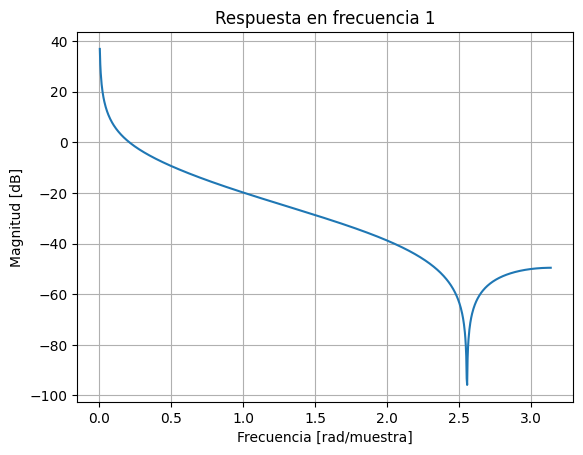

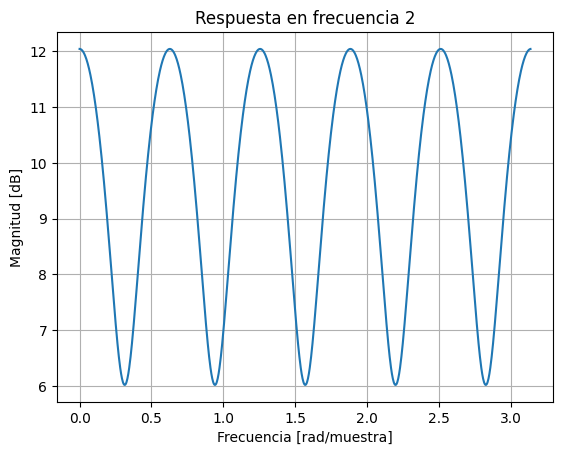

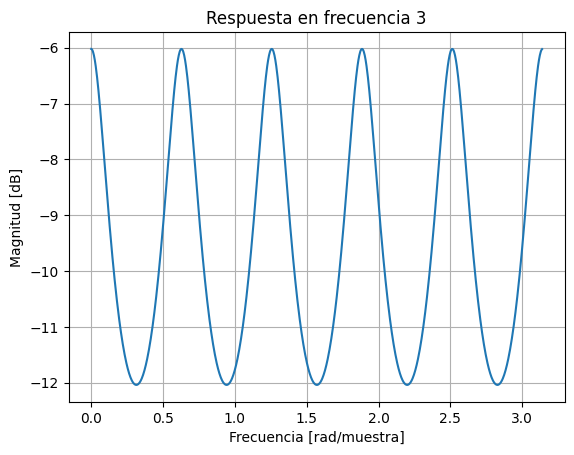

In [8]:
#Respuesta en frecuencia LTI TS2

#y[n]=3⋅10−2⋅x[n]+5⋅10−2⋅x[n−1]+3⋅10−2⋅x[n−2]+1.5⋅y[n−1]−0.5⋅y[n−2]
# Coeficientes del sistema
b = [0.03, 0.05, 0.03]     # coeficientes de entrada (numerador)
a = [1, -1.5, 0.5]         # coeficientes de salida (denominador)

# Calcula respuesta en frecuencia a través de la función transferencia
w, h = freqz(b, a, N, whole=False)  # w en rad/muestra

plt.figure(9)
plt.plot(w, 20*np.log10(np.abs(h)))
plt.title('Respuesta en frecuencia 1')
plt.ylabel('Magnitud [dB]')
plt.xlabel('Frecuencia [rad/muestra]')
plt.grid()

#y[n] = x[n] + 3 x[n-10]
b1 = np.zeros(11)
b1[0] = 1
b1[10] = 3
a1 = [1]

w1, h1 = freqz(b1, a1, N, whole=False)  # w en rad/muestra

plt.figure(10)
plt.plot(w1, 20*np.log10(np.abs(h1)))
plt.title('Respuesta en frecuencia 2')
plt.ylabel('Magnitud [dB]')
plt.xlabel('Frecuencia [rad/muestra]')
plt.grid()

#y[n] = x[n] + 3 y[n-10]
b2 = [1]
a2 = np.zeros(11)
a2[0] = 1
a2[10] = -3

w2, h2 = freqz(b2, a2, N, whole=False)  # w en rad/muestra

plt.figure(11)
plt.plot(w2, 20*np.log10(np.abs(h2)))
plt.title('Respuesta en frecuencia 3')
plt.ylabel('Magnitud [dB]')
plt.xlabel('Frecuencia [rad/muestra]')
plt.grid()


- Para el primer sistema, el descenso inicial indica que las frecuencias bajas están atenuadas. Luego, forma un pico mínimo, seguido de un pequeño aumento, el cual sugiere que existe resonancia en cierta frecuencia (se amplifica más de lo habitual).
- En cambio, para el segundo sistema, se puede observar una especie de senoidal entre 12 dB y 6 dB. La periodicidad en la magnitud se debe a los retardos largos (delay de 10 muestras), los cuales crean un patrón de interferencia constructiva y destructiva en las distintas frecuencias, generando esa oscilación.
- Finalmente, el tercer sistema, guarda cierta similitud con lo ocurrido en el segundo. Las oscilaciones negativas (de -6 dB a -12 dB) reflejan que el sistema atenúa algunas frecuencias y amplifica otras periódicamente, debido a la retroalimentación con retardos largos.

### Cuestiones a tener en cuenta
- Esta tarea funcionó un poco mejor. Me sirvió para afianzar los conceptos desarrollados en clase. Siento que me ayudó más y entendí mejor.
- El Bonus no fue tan fácil y no sé si pude realizarlo correctamente, pero intenté explicar algunas cuestiones.